# Brain Age Gap Investigation

In [2]:
import pandas as pd
import numpy as np
import importlib
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

Load saved overview of IDs, metadata, predictions, and BAGs:

In [3]:
# save path for predictions
overview_path = '/ritter/share/projects/laura_riedel_thesis/predictions/predictions_overview_100-500p.csv'
# load data overview
data_overview_full = pd.read_csv(overview_path)
# limit to IDs present in heldout test set
data_overview_heldout = data_overview_full[data_overview_full['split']=='heldout_test'].copy()
data_overview_heldout.reset_index(inplace=True,drop=True)

Linearly detrend BAGs:

In [4]:
data_overview_heldout = utils.detrend_bag(data_overview_heldout, models=['orig','new'])
data_overview_heldout

,eid,age,split,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,...,genetic pc 2,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new,bag_orig_detrended,bag_new_detrended
0,1000030,65,heldout_test,21.2569,NaN,20.0,8.0,18.0,1.0,1.0,...,4.109090,-0.344172,1.0,64.256958,1.0,71.693298,-0.743042,6.693298,-0.697239,6.759642
1,1000059,68,heldout_test,NaN,22.0,20.0,7.0,NaN,0.0,0.0,...,4.809360,-1.093500,18.0,58.876446,18.0,58.413288,-9.123554,-9.586712,-7.597349,-8.031745
2,1000077,58,heldout_test,33.4834,18.0,19.0,3.0,48.0,NaN,NaN,...,3.185920,0.260200,34.0,63.836048,34.0,66.193604,5.836048,8.193604,2.427579,4.786494
3,1000100,57,heldout_test,23.4552,NaN,20.0,NaN,28.0,0.0,0.0,...,0.876031,-4.452460,2.0,55.072990,2.0,57.406872,-1.927010,0.406872,-5.828947,-3.496446
4,1000202,67,heldout_test,26.6846,19.0,20.0,6.0,45.0,NaN,NaN,...,2.064990,-4.424320,16.0,64.058601,16.0,67.427048,-2.941399,0.427048,-1.908661,1.485807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2035762,73,heldout_test,25.3688,12.0,7.0,5.0,24.0,0.0,0.0,...,2.648290,-2.457690,7.0,77.852402,7.0,74.190857,4.852402,1.190857,8.845944,5.226862
4996,2264650,61,heldout_test,30.5389,NaN,7.0,NaN,41.0,0.0,0.0,...,4.967310,-3.327250,29.0,61.950256,29.0,63.557865,0.950256,2.557865,-0.977811,0.639379
4997,2329354,68,heldout_test,22.5614,18.0,20.0,8.0,30.0,0.0,0.0,...,NaN,NaN,36.0,66.802460,36.0,65.315231,-1.197540,-2.684769,0.328665,-1.129802
4998,2457356,60,heldout_test,29.6270,18.0,20.0,8.0,22.0,1.0,1.0,...,NaN,NaN,9.0,61.610027,9.0,63.635746,1.610027,3.635746,-0.811507,1.221052


In [13]:
# overview of example subs for local explainability
ids = [1137757,1318155,1184162,1364474,1031078,1457519]
data_overview_heldout[data_overview_heldout['eid'].isin(ids)]

,eid,age,split,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,...,genetic pc 2,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new,bag_orig_detrended,bag_new_detrended
332,1031078,58,heldout_test,30.9633,24.0,19.0,8.0,40.0,0.0,0.0,...,3.51011,-1.576750,29.0,70.719391,29.0,70.724068,12.719391,12.724068,9.310921,9.316958
1491,1137757,48,heldout_test,25.5993,20.0,20.0,7.0,50.0,0.0,0.0,...,2.70432,-0.222601,10.0,49.116467,10.0,47.434200,1.116467,-0.565800,-7.226678,-8.934986
1992,1184162,69,heldout_test,26.8905,18.0,20.0,4.0,26.0,0.0,0.0,...,3.49319,-1.506880,6.0,47.786812,6.0,47.554008,-21.213188,-21.445992,-19.193515,-19.394817
3417,1318155,81,heldout_test,22.9840,15.0,20.0,6.0,20.0,0.0,0.0,...,3.71402,-3.803910,23.0,70.533844,23.0,69.509438,-10.466156,-11.490562,-2.524873,-3.484895
3956,1364474,71,heldout_test,22.0840,6.0,20.0,7.0,30.0,0.0,0.0,...,5.75350,-2.626010,2.0,80.223434,2.0,81.724228,9.223434,10.724228,12.230042,13.767818
4968,1457519,59,heldout_test,24.0490,26.0,20.0,9.0,48.0,0.0,0.0,...,4.27521,-2.563990,25.0,71.981110,25.0,60.826702,12.981110,1.826702,10.066107,-1.084200


Age mean in heldout test set:

In [21]:
np.mean(data_overview_heldout['age'])

63.8966

Check correlations with true age:

In [5]:
viz.preds_corr_overview(data_overview_heldout, variables=False, models=['orig','new'])

,True age vs.,Corr
0,Predicted age orig model,0.698633
1,BAG orig model,-0.68195
2,Detrended BAG orig model,0.008631
3,Predicted age new model,0.708023
4,BAG new model,-0.691294
5,Detrended BAG new model,0.008962


Check correlations with variables:

In [26]:
viz.preds_corr_overview(data_overview_heldout, variables=True, models=['orig','new'])

,Variable,Corr BAG orig model,Corr detrended BAG orig model,Corr BAG new model,Corr detrended BAG new model
0,bmi,0.041969,0.042570,0.059447,0.069037
1,digit substitution,0.279084,-0.032622,0.267831,-0.053969
2,education,0.060136,-0.020173,0.038763,-0.052235
3,fluid intelligence,0.026163,-0.038003,0.030872,-0.040979
4,grip,0.118088,0.034018,0.141837,0.063241
5,depressive episode,0.074399,0.033809,0.075793,0.037338
6,all depression,0.076666,0.035009,0.077201,0.036993
7,recurrent depressive disorder,0.048612,0.017808,0.053634,0.024275
8,multiple sclerosis,0.032390,0.008108,0.036134,0.017655
9,sex,-0.024357,0.064979,-0.001830,0.093572


In [11]:
# save overviews as LaTeX table
# table_path = '../../viz/'
# true_age_corrs.to_latex(table_path+'table_true_age_corrs.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)
# variables_corrs.to_latex(table_path+'table_variables_corrs.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)

/tmp/ipykernel_3660902/2613995111.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  true_age_corrs.to_latex(table_path+'table_true_age_corrs.tex',
/tmp/ipykernel_3660902/2613995111.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  variables_corrs.to_latex(table_path+'table_variables_corrs.tex',


Check partial correlations when taking sex + age as confounds:

In [33]:
viz.preds_corr_overview(data_overview_heldout, variables=True, models=['orig','new'], covariates=['age','sex'])

,Variable,Corr BAG orig model,CI95 BAG orig model,p-val BAG orig model,Corr BAG new model,CI95 BAG new model,p-val BAG new model
0,bmi,0.039629,[0.01 0.07],0.005930,0.060637,[0.03 0.09],0.000025
1,digit substitution,-0.025947,[-0.06 0.01],0.132993,-0.054283,[-0.09 -0.02],0.001662
2,education,-0.020408,[-0.05 0.01],0.151401,-0.053638,[-0.08 -0.03],0.000161
3,fluid intelligence,-0.046169,[-0.07 -0.02],0.001749,-0.043451,[-0.07 -0.01],0.003226
4,grip,-0.016659,[-0.04 0.01],0.247502,-0.007810,[-0.04 0.02],0.587707
5,depressive episode,0.038896,[0.01 0.07],0.010432,0.044078,[0.01 0.07],0.003699
6,all depression,0.039110,[0.01 0.07],0.009947,0.043123,[0.01 0.07],0.004477
7,recurrent depressive disorder,0.018847,[-0.01 0.05],0.247561,0.026624,[-0.01 0.06],0.102339
8,multiple sclerosis,0.015063,[-0.02 0.05],0.351876,0.020757,[-0.01 0.05],0.199495
9,weekly beer,0.015708,[-0.02 0.05],0.353848,0.010056,[-0.02 0.04],0.552834


Check partial correlations when taking sex + age + education as confounds:

In [32]:
viz.preds_corr_overview(data_overview_heldout, variables=True, models=['orig','new'], covariates=['age','sex','education'])

,Variable,Corr BAG orig model,CI95 BAG orig model,p-val BAG orig model,Corr BAG new model,CI95 BAG new model,p-val BAG new model
0,bmi,0.040815,[0.01 0.07],0.004812,0.057102,[0.03 0.09],0.000079
1,digit substitution,-0.023587,[-0.06 0.01],0.173186,-0.048148,[-0.08 -0.01],0.005410
2,fluid intelligence,-0.041363,[-0.07 -0.01],0.005164,-0.031497,[-0.06 -0. ],0.033238
3,grip,-0.014567,[-0.04 0.01],0.314444,-0.004381,[-0.03 0.02],0.762253
4,depressive episode,0.038149,[0.01 0.07],0.012481,0.044818,[0.01 0.07],0.003331
5,all depression,0.038388,[0.01 0.07],0.011860,0.043898,[0.01 0.07],0.004004
6,recurrent depressive disorder,0.019445,[-0.01 0.05],0.235236,0.028305,[-0. 0.06],0.083986
7,multiple sclerosis,0.015186,[-0.02 0.05],0.350229,0.021307,[-0.01 0.05],0.189951
8,weekly beer,0.012919,[-0.02 0.05],0.446333,0.002944,[-0.03 0.04],0.862243
9,genetic pc 1,-0.014430,[-0.04 0.01],0.317080,-0.005355,[-0.03 0.02],0.710425


Using bootstrapping for confidence interval of correlations:

In [100]:
true_age_corrs_bs, variables_corrs_bs = utils.bootstrap_pipeline(data_overview_heldout,models=['orig','new'],n_iterations=2000)
true_age_corrs_bs

,True age vs.,Corr,Corr mean,Corr sem,Corr z,Corr p
0,Predicted age orig model,0.698633,0.698909,0.007724,90.484414,0.000000
1,BAG orig model,-0.68195,-0.681559,0.007726,-88.218512,0.000000
2,Detrended BAG orig model,0.008631,0.009428,0.013933,0.676648,0.498630
3,Predicted age new model,0.708023,0.708136,0.007301,96.989879,0.000000
4,BAG new model,-0.691294,-0.691004,0.007721,-89.501189,0.000000
5,Detrended BAG new model,0.008962,0.009423,0.014035,0.671363,0.501989


In [101]:
variables_corrs_bs

,Variable,Corr BAG orig model,Corr BAG orig model mean,Corr BAG orig model sem,Corr BAG orig z,Corr BAG orig p,Corr detrended BAG orig model,Corr detrended BAG orig model mean,Corr detrended BAG orig model sem,Corr detrended BAG orig z,...,Corr BAG new model,Corr BAG new model mean,Corr BAG new model sem,Corr BAG new z,Corr BAG new p,Corr detrended BAG new model,Corr detrended BAG new model mean,Corr detrended BAG new model sem,Corr detrended BAG new z,Corr detrended BAG new p
0,bmi,0.041969,0.041704,0.014068,2.964467,3.032075e-03,0.042570,0.042566,0.014075,3.024178,...,0.059447,0.059262,0.013735,4.314663,1.598466e-05,0.069037,0.069087,0.013785,5.011737,5.394081e-07
1,digit substitution,0.279084,0.279091,0.015703,17.773380,1.136340e-70,-0.032622,-0.032892,0.016893,-1.947065,...,0.267831,0.267824,0.015985,16.754829,5.221059e-63,-0.053969,-0.054133,0.017143,-3.157764,1.589840e-03
2,education,0.060136,0.060046,0.013989,4.292348,1.767939e-05,-0.020173,-0.020641,0.014009,-1.473431,...,0.038763,0.038804,0.014124,2.747412,6.006768e-03,-0.052235,-0.052614,0.014096,-3.732561,1.895426e-04
3,fluid intelligence,0.026163,0.025680,0.014874,1.726432,8.426965e-02,-0.038003,-0.038967,0.014735,-2.644458,...,0.030872,0.030559,0.015147,2.017518,4.364150e-02,-0.040979,-0.041591,0.014886,-2.793858,5.208342e-03
4,grip,0.118088,0.117630,0.014369,8.186332,2.693078e-16,0.034018,0.033330,0.014413,2.312485,...,0.141837,0.141459,0.014116,10.021423,1.227231e-23,0.063241,0.062764,0.014103,4.450326,8.574009e-06
5,depressive episode,0.074399,0.074086,0.015215,4.869406,1.119340e-06,0.033809,0.033328,0.015562,2.141668,...,0.075793,0.075711,0.014838,5.102376,3.354159e-07,0.037338,0.037177,0.015188,2.447708,1.437683e-02
6,all depression,0.076666,0.076296,0.015238,5.006895,5.531501e-07,0.035009,0.034503,0.015678,2.200794,...,0.077201,0.077059,0.014839,5.192946,2.069926e-07,0.036993,0.036797,0.015278,2.408437,1.602101e-02
7,recurrent depressive disorder,0.048612,0.048225,0.018473,2.610543,9.039863e-03,0.017808,0.017737,0.019114,0.927951,...,0.053634,0.053335,0.017544,3.040053,2.365369e-03,0.024275,0.024188,0.018996,1.273312,2.029073e-01
8,multiple sclerosis,0.032390,0.032094,0.016162,1.985812,4.705418e-02,0.008108,0.007942,0.015600,0.509127,...,0.036134,0.035861,0.017650,2.031812,4.217267e-02,0.017655,0.017510,0.017414,1.005541,3.146364e-01
9,sex,-0.024357,-0.024516,0.014355,-1.707795,8.767446e-02,0.064979,0.064858,0.014102,4.599347,...,-0.001830,-0.002017,0.014355,-0.140535,8.882373e-01,0.093572,0.093437,0.013942,6.702003,2.055823e-11


Bootstrap partial correlations:

In [103]:
# confounds: age + sex
utils.bootstrap_pipeline(data_overview_heldout,models=['orig','new'],n_iterations=2000, covariates=['age','sex'])

,Variable,Corr BAG orig model,Corr BAG orig model mean,Corr BAG orig model sem,Corr BAG orig z,Corr BAG orig p,Corr BAG new model,Corr BAG new model mean,Corr BAG new model sem,Corr BAG new z,Corr BAG new p
0,bmi,0.039629,0.039536,0.014141,2.795910,0.005175,0.060637,0.060667,0.013847,4.381356,0.000012
1,digit substitution,-0.025947,-0.025805,0.017755,-1.453372,0.146121,-0.054283,-0.054144,0.017568,-3.081989,0.002056
2,education,-0.020408,-0.020818,0.013932,-1.494216,0.135119,-0.053638,-0.053904,0.014103,-3.822246,0.000132
3,fluid intelligence,-0.046169,-0.046944,0.014800,-3.171837,0.001515,-0.043451,-0.044018,0.014860,-2.962237,0.003054
4,grip,-0.016659,-0.017247,0.014689,-1.174134,0.240341,-0.007810,-0.008290,0.014495,-0.571948,0.567357
5,depressive episode,0.038896,0.038292,0.015249,2.511114,0.012035,0.044078,0.043775,0.014814,2.955040,0.003126
6,all depression,0.039110,0.038452,0.015388,2.498917,0.012457,0.043123,0.042762,0.014932,2.863717,0.004187
7,recurrent depressive disorder,0.018847,0.018510,0.019433,0.952469,0.340859,0.026624,0.026403,0.018273,1.444933,0.148477
8,multiple sclerosis,0.015063,0.014987,0.016960,0.883659,0.376880,0.020757,0.020719,0.018248,1.135400,0.256208
9,weekly beer,0.015708,0.016176,0.016798,0.963003,0.335546,0.010056,0.010773,0.016609,0.648627,0.516579


In [104]:
# confounds: age + sex + education
utils.bootstrap_pipeline(data_overview_heldout,models=['orig','new'],n_iterations=2000, covariates=['age','sex','education'])

,Variable,Corr BAG orig model,Corr BAG orig model mean,Corr BAG orig model sem,Corr BAG orig z,Corr BAG orig p,Corr BAG new model,Corr BAG new model mean,Corr BAG new model sem,Corr BAG new z,Corr BAG new p
0,bmi,0.040815,0.040694,0.014320,2.841743,0.004487,0.057102,0.057137,0.013949,4.096010,0.000042
1,digit substitution,-0.023587,-0.023447,0.017713,-1.323717,0.185597,-0.048148,-0.048079,0.017641,-2.725355,0.006423
2,fluid intelligence,-0.041363,-0.042031,0.014819,-2.836380,0.004563,-0.031497,-0.032007,0.015004,-2.133208,0.032908
3,grip,-0.014567,-0.015132,0.014854,-1.018727,0.308333,-0.004381,-0.004897,0.014606,-0.335252,0.737435
4,depressive episode,0.038149,0.037503,0.015356,2.442186,0.014599,0.044818,0.044476,0.014900,2.984880,0.002837
5,all depression,0.038388,0.037688,0.015503,2.430990,0.015058,0.043898,0.043496,0.015020,2.895784,0.003782
6,recurrent depressive disorder,0.019445,0.019126,0.019504,0.980610,0.326785,0.028305,0.028077,0.018358,1.529403,0.126165
7,multiple sclerosis,0.015186,0.015111,0.017123,0.882501,0.377506,0.021307,0.021260,0.018634,1.140914,0.253906
8,weekly beer,0.012919,0.013338,0.016967,0.786080,0.431821,0.002944,0.003596,0.016759,0.214579,0.830096
9,genetic pc 1,-0.014430,-0.014450,0.014446,-1.000303,0.317164,-0.005355,-0.004991,0.014659,-0.340514,0.733469


## Initial visualisations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

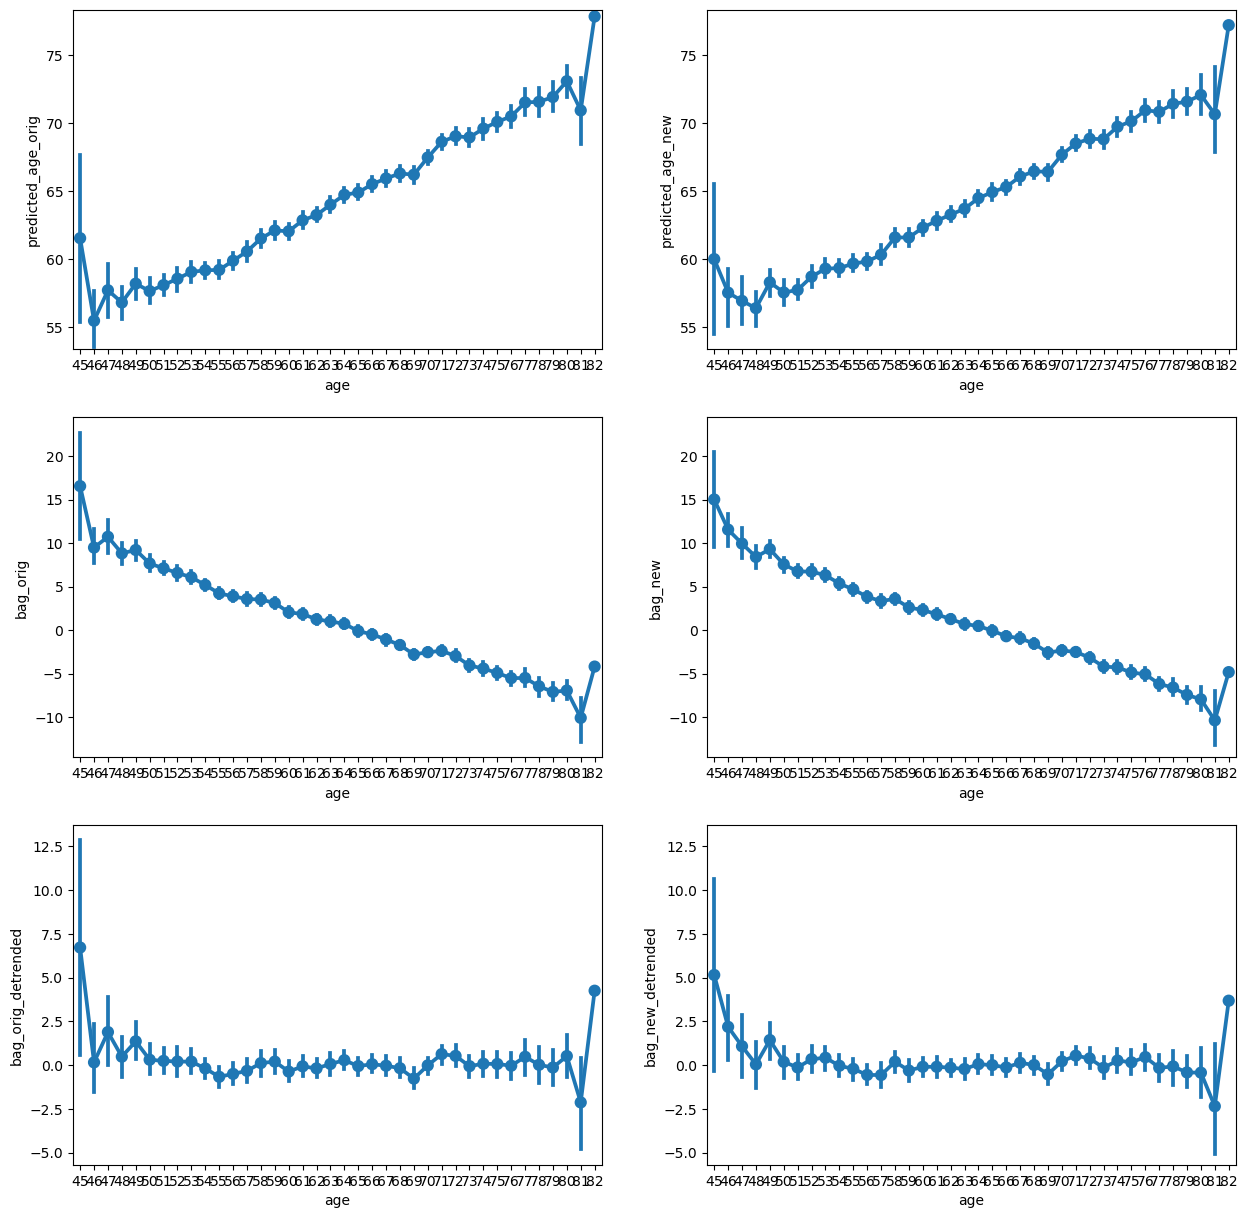

In [15]:
fig, axes = plt.subplots(3,2,figsize=(15, 15))
sns.pointplot(data=data_overview_heldout, x='age', y='predicted_age_orig', ax=axes[0,0])
sns.pointplot(data=data_overview_heldout, x='age', y='predicted_age_new', ax=axes[0,1])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_orig', ax=axes[1,0])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_new', ax=axes[1,1])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_orig_detrended', ax=axes[2,0])
sns.pointplot(data=data_overview_heldout, x='age', y='bag_new_detrended', ax=axes[2,1])
# make y axes comparable
axes[0,0].sharey(axes[0,1])
axes[1,1].sharey(axes[1,0])
axes[2,1].sharey(axes[2,0])
fig.show()

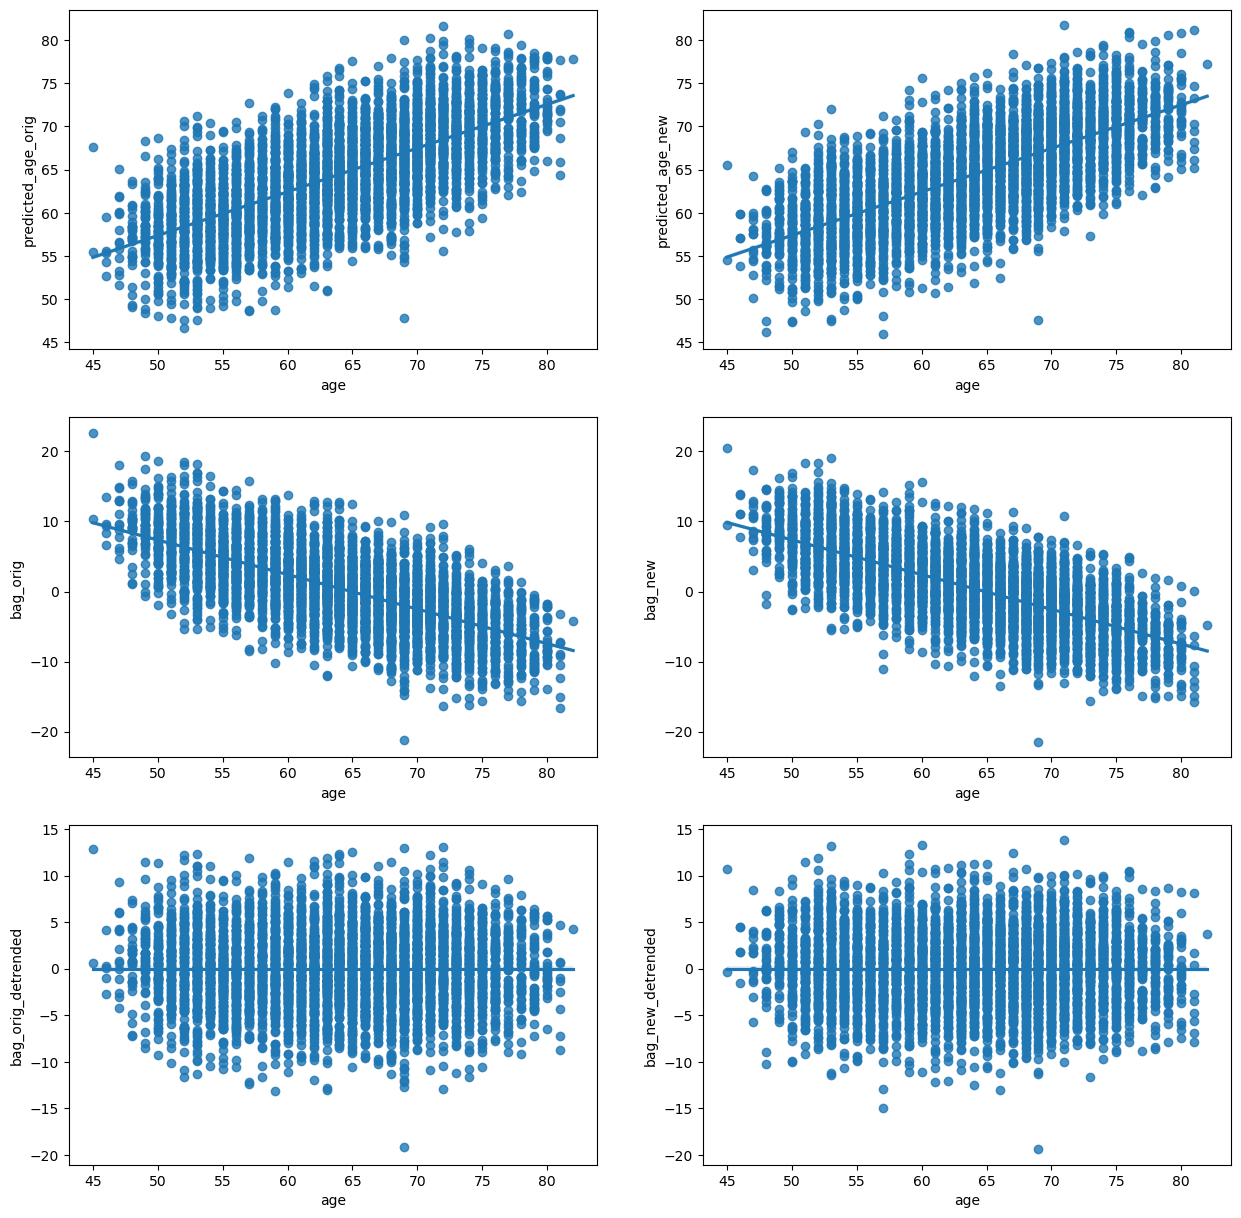

In [5]:
fig, axes = plt.subplots(3,2,figsize=(15, 15))
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_orig', ax=axes[0,0])
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_new', ax=axes[0,1])
sns.regplot(data=data_overview_heldout, x='age', y='bag_orig', ax=axes[1,0])
sns.regplot(data=data_overview_heldout, x='age', y='bag_new', ax=axes[1,1])
sns.regplot(data=data_overview_heldout, x='age', y='bag_orig_detrended', ax=axes[2,0])
sns.regplot(data=data_overview_heldout, x='age', y='bag_new_detrended', ax=axes[2,1])
# make y axes comparable
axes[0,0].sharey(axes[0,1])
axes[1,1].sharey(axes[1,0])
axes[2,1].sharey(axes[2,0])
fig.show()

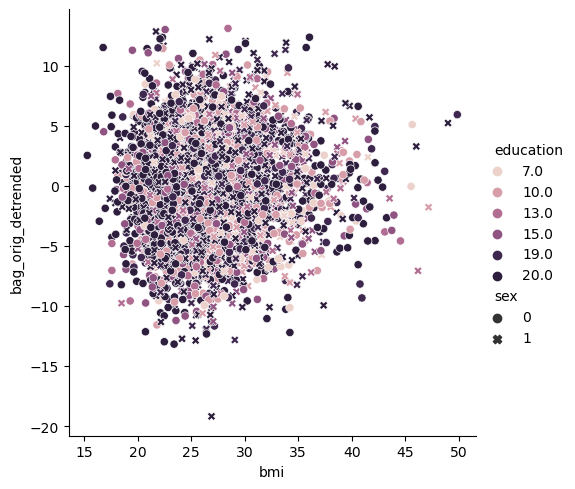

In [6]:
sns.relplot(data=data_overview_heldout, y='bag_orig_detrended', x='bmi', hue='education',style='sex');

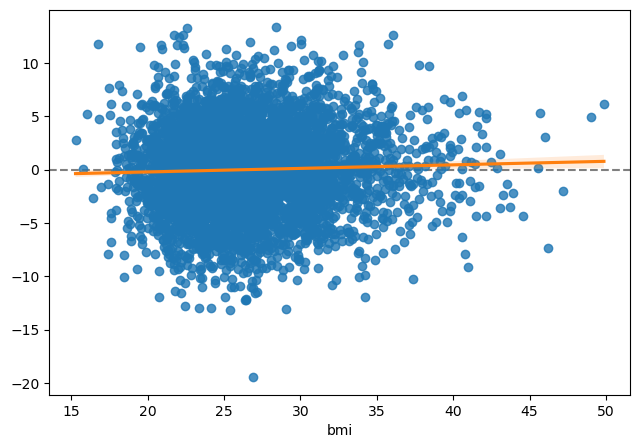

In [16]:
fig, axes = plt.subplots(figsize=(7.5,5))
sns.regplot(data=data_overview_heldout, y='bag_orig_detrended', x='bmi', y_partial=data_overview_heldout[['sex']], line_kws=dict(color='#ff7f0e'))
axes.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
fig.show()

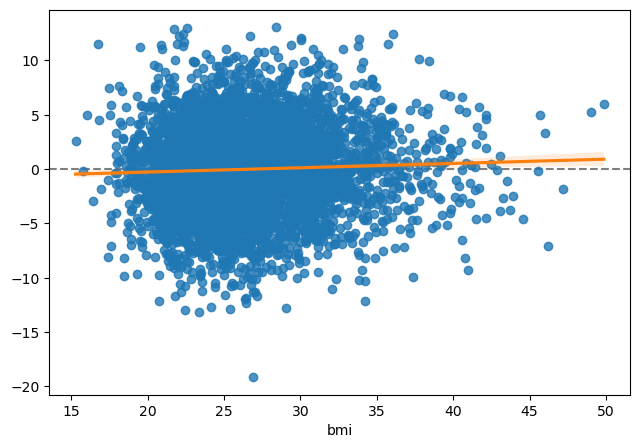

In [18]:
fig, axes = plt.subplots(figsize=(7.5,5))
sns.regplot(data=data_overview_heldout, y='bag_orig_detrended', x='bmi', y_partial='education', line_kws=dict(color='#ff7f0e'))
axes.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
fig.show()

In [5]:
# prepare variable columns for different plotting
binary_variables = ['depressive episode', 'recurrent depressive disorder', 
                     'all depression', 'multiple sclerosis', 'sex']
discrete_variables = ['digit substitution', 'education', 
                      'fluid intelligence', 'grip', 'weekly beer']
continuous_variables = ['bmi', 'genetic pc 1', 'genetic pc 2', 'genetic pc 3']

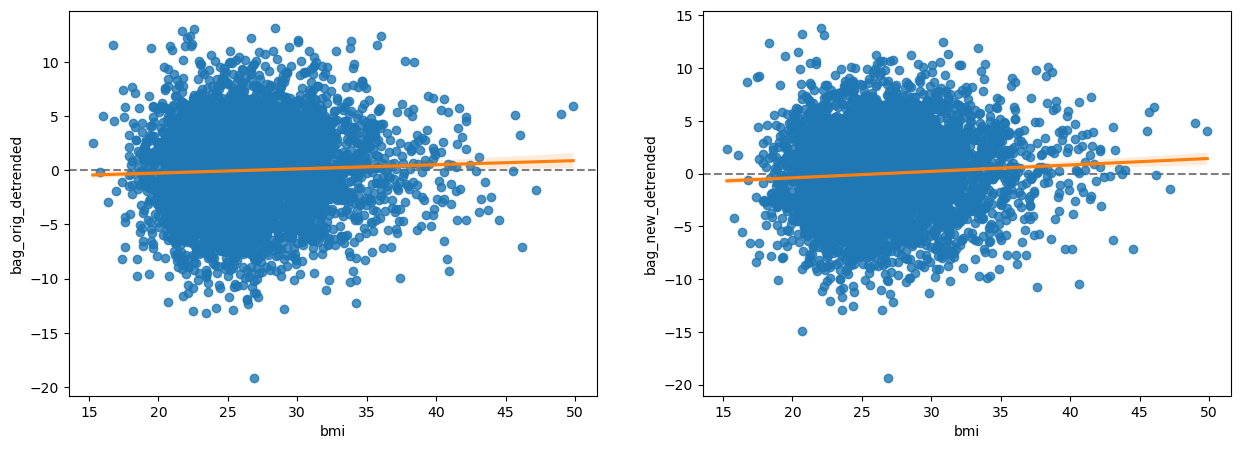

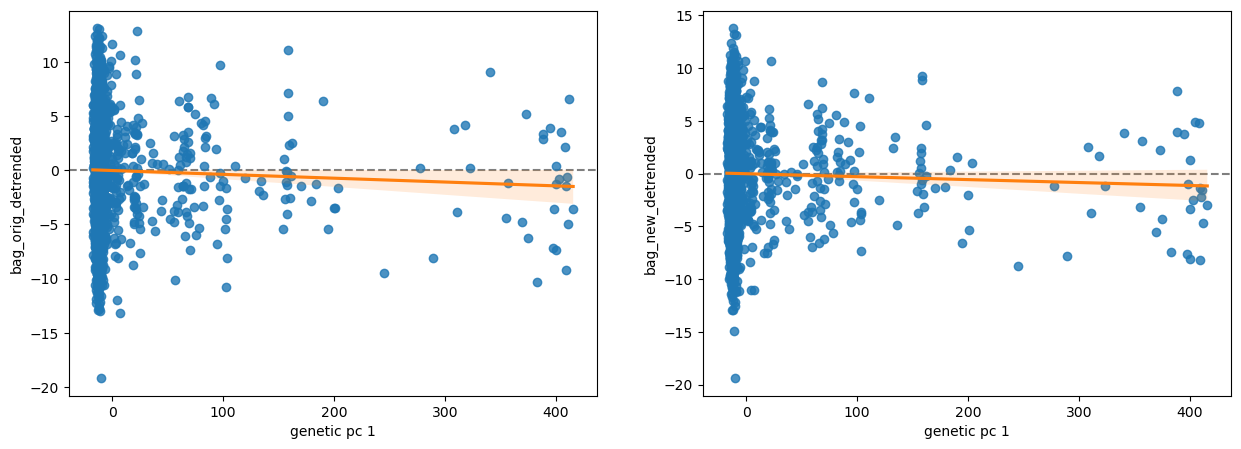

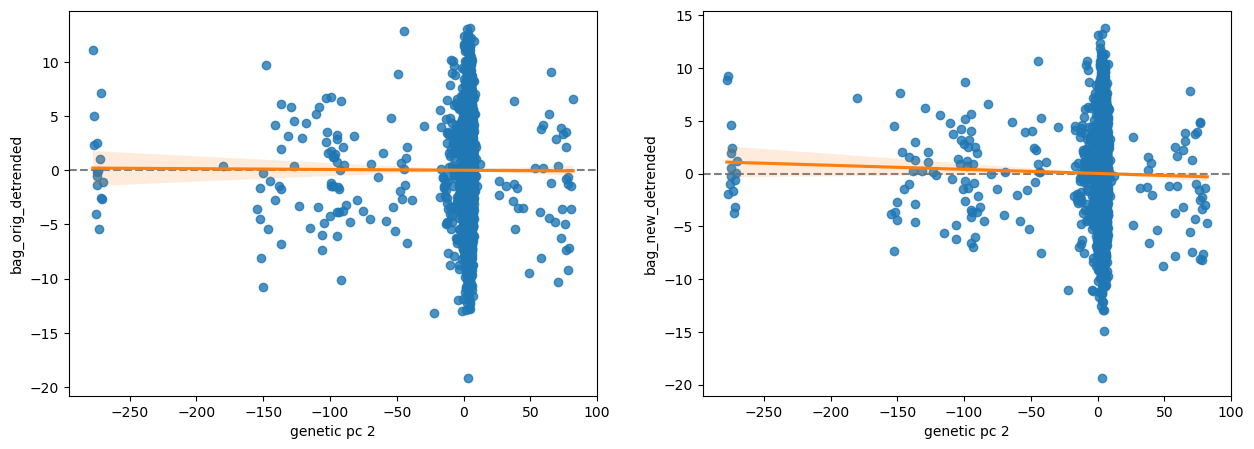

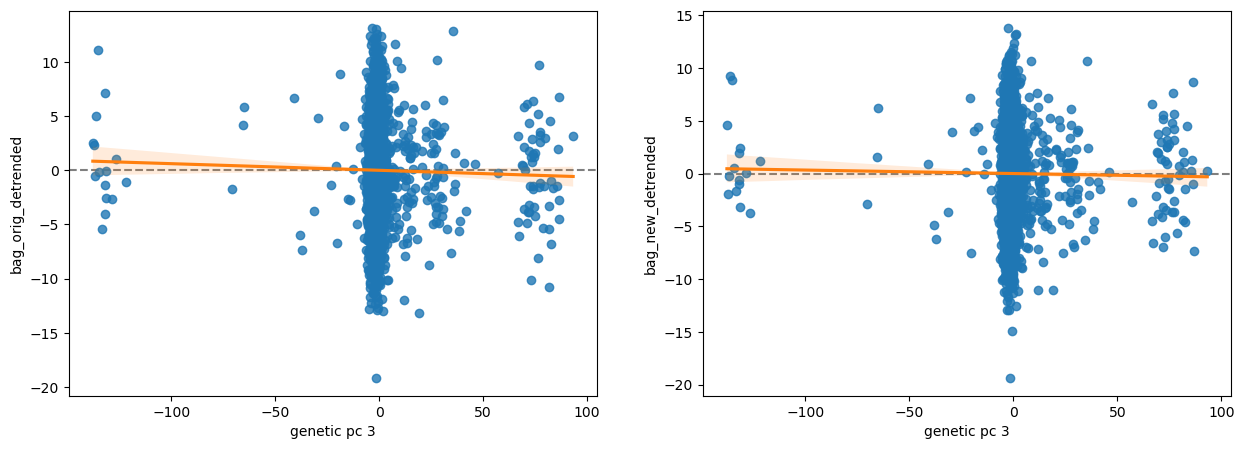

In [12]:
for column in continuous_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.regplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0], line_kws=dict(color='#ff7f0e'))
    sns.regplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1], line_kws=dict(color='#ff7f0e'))
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()

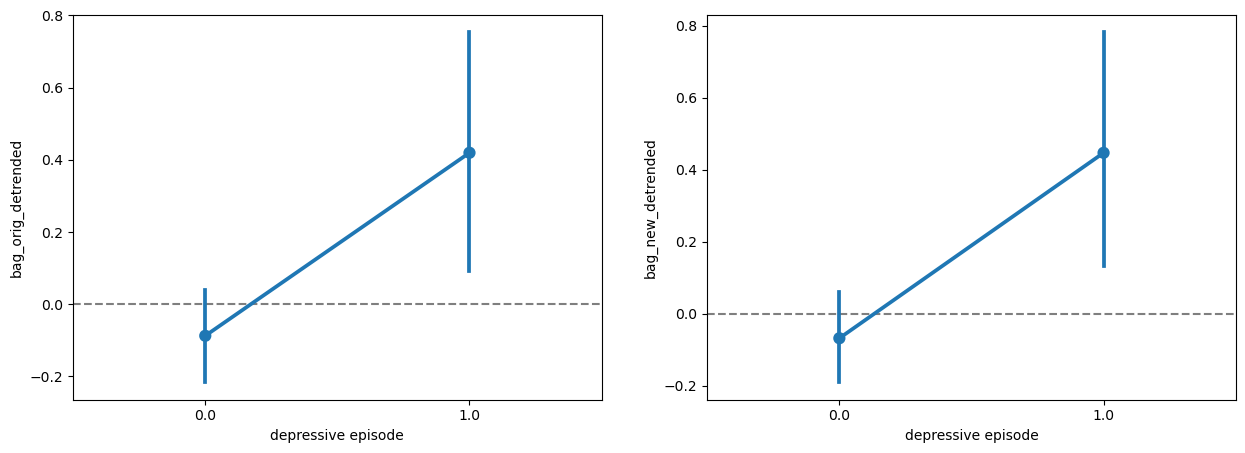

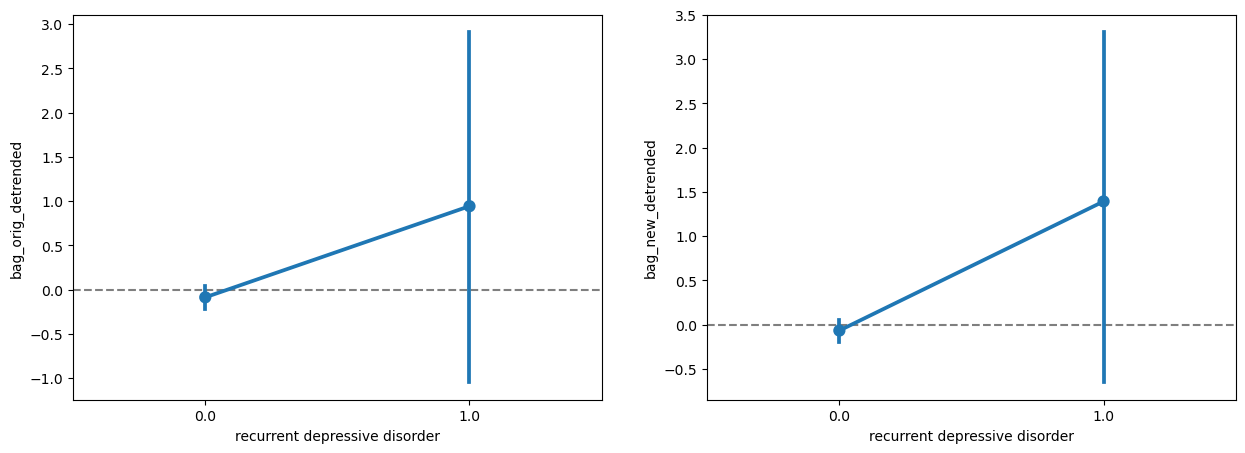

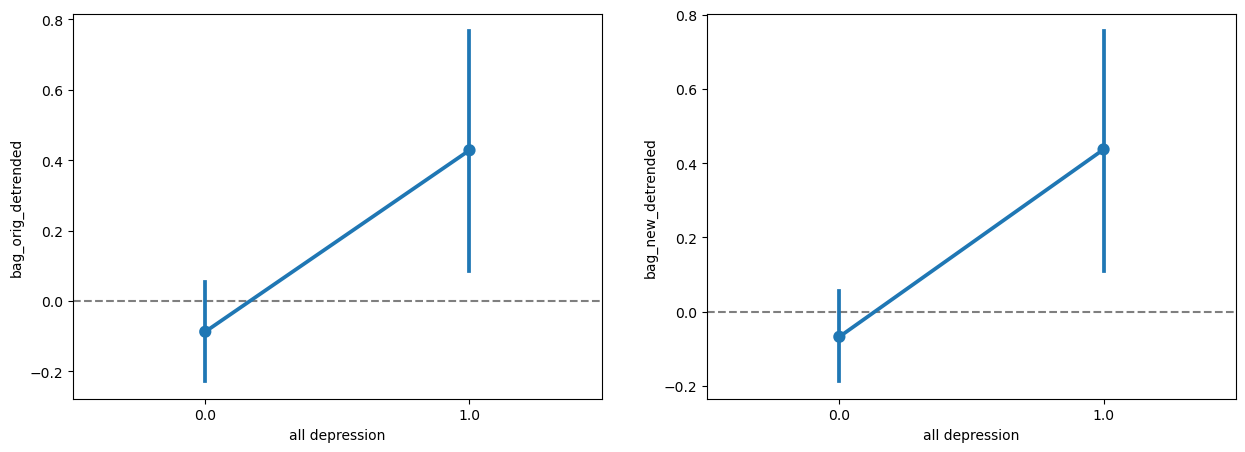

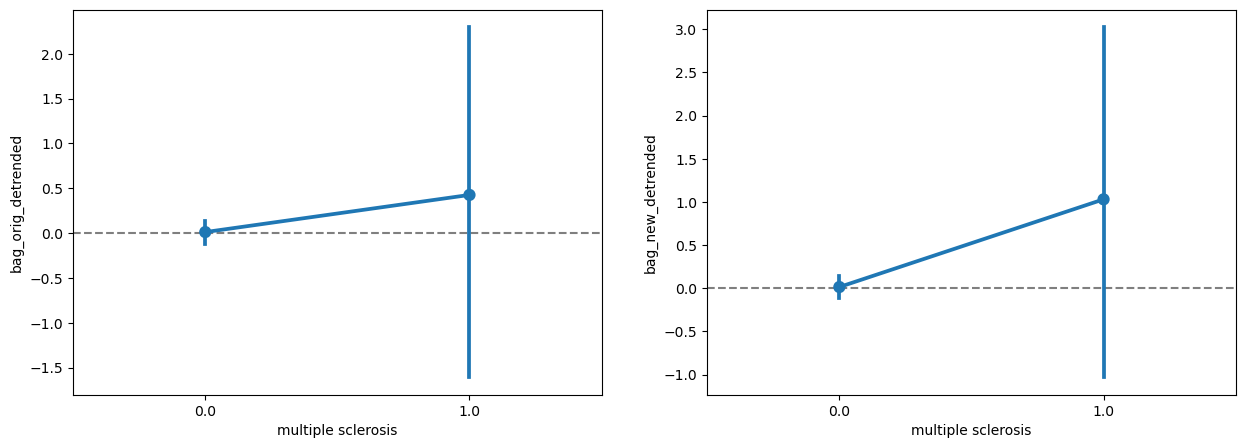

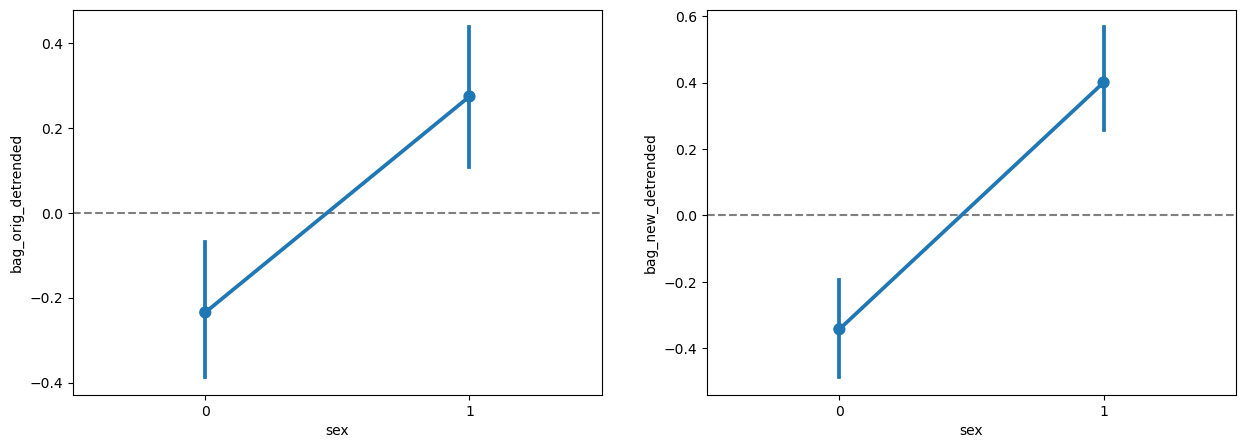

In [11]:
for column in binary_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.pointplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0])
    sns.pointplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1])
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()

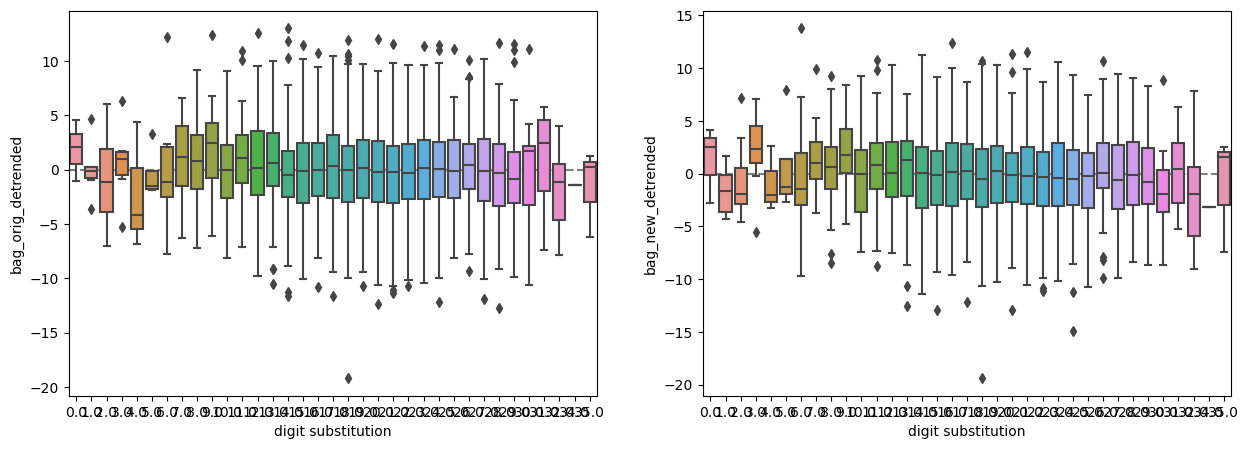

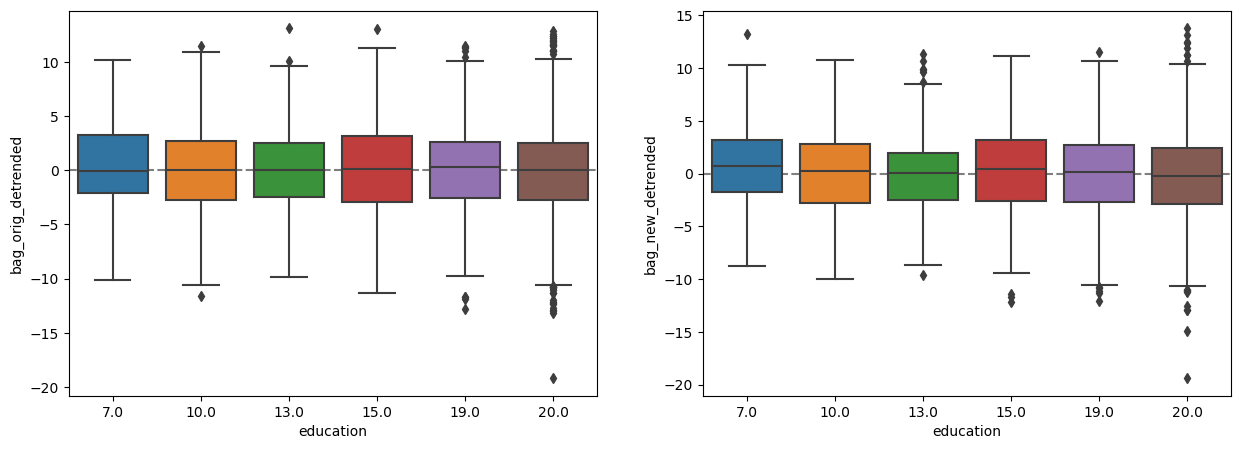

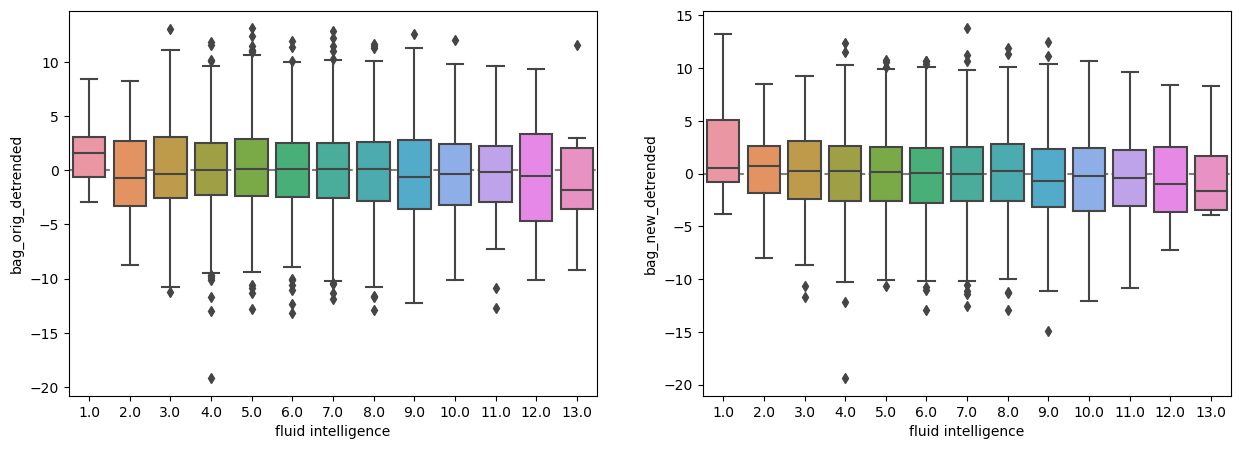

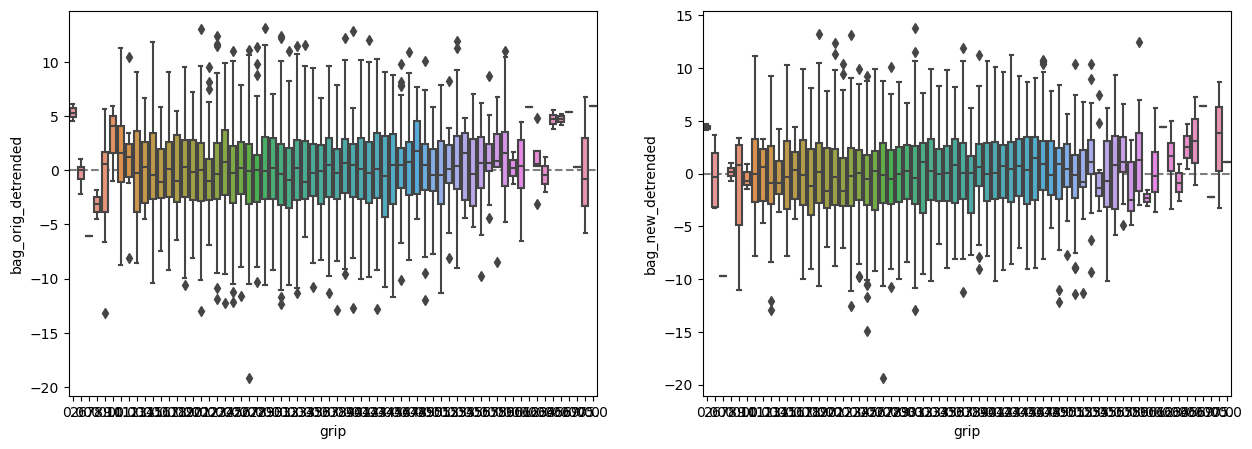

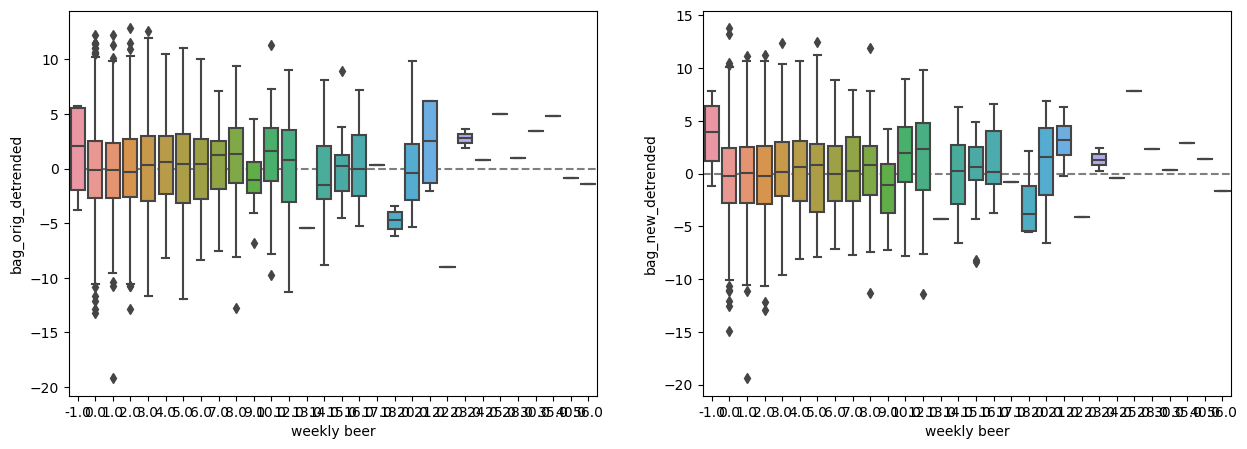

In [10]:
for column in discrete_variables:
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    sns.boxplot(data=data_overview_heldout, y='bag_orig_detrended', x=column, ax=axes[0])
    sns.boxplot(data=data_overview_heldout, y='bag_new_detrended', x=column, ax=axes[1])
    for ax in axes:
        ax.axhline(y=0, color='#7f7f7f', linestyle='--', zorder=0)
    fig.show()

## Final visualisations

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_path = '../../viz/'

Age vs. predicted age

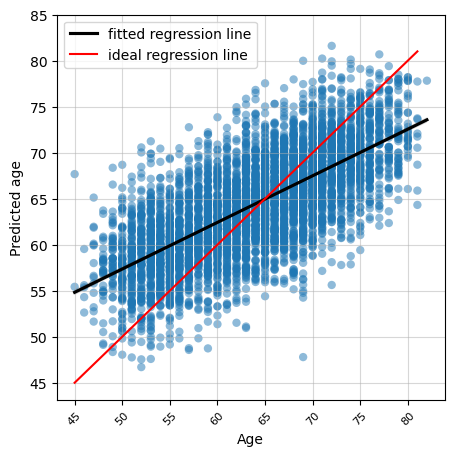

In [29]:
# shallow
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['predicted_age_orig'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_orig',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(45,82)
axes.plot(x,y, color='#FF0000', linestyle='-', zorder=2, label='ideal regression line') 
axes.set(ylabel='Predicted age',
       yticks=[45,50,55,60,65,70,75,80,85], 
       xlabel='Age'
      )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='upper left')
axes.grid(alpha=0.5)
# plt.savefig(fig_path+'age_pred_age_shallow.pdf', bbox_inches='tight')
fig.show()

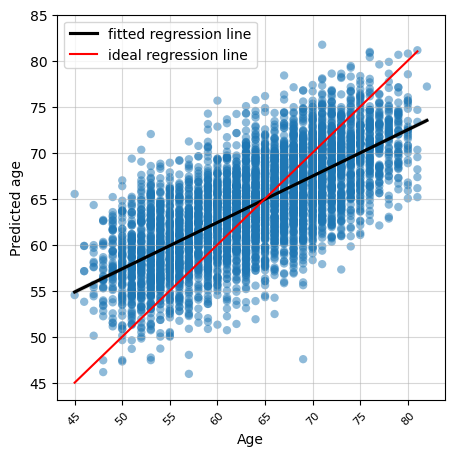

In [30]:
# deep
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['predicted_age_new'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_new',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(45,82)
axes.plot(x,y, color='#FF0000', linestyle='-', zorder=2, label='ideal regression line') 
axes.set(ylabel='Predicted age',
       yticks=[45,50,55,60,65,70,75,80,85], 
       xlabel='Age'
      )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='upper left')
axes.grid(alpha=0.5)
# plt.savefig(fig_path+'age_pred_age_deep.pdf', bbox_inches='tight')
fig.show()

Age vs. detrended BAG

In [15]:
# BAG ranges
print(data_overview_heldout['bag_orig_detrended'].min(), data_overview_heldout['bag_orig_detrended'].max())
print(data_overview_heldout['bag_new_detrended'].min(), data_overview_heldout['bag_new_detrended'].max())

-19.193515389953163 13.100882445661817
-19.39481669092548 13.767818087012685


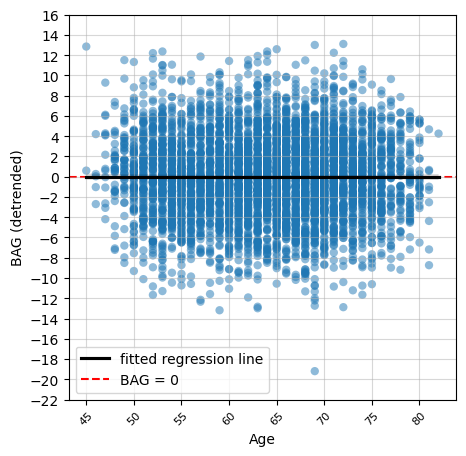

In [34]:
# shallow
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['bag_orig_detrended'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='bag_orig_detrended',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(-22,17,2)
axes.axhline(y=0, color='#FF0000', linestyle='--', zorder=0, label='BAG = 0') #
axes.set(ylabel='BAG (detrended)',
        yticks=y,
        xlabel='Age'
        )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='lower left')
axes.grid(alpha=0.5)
plt.savefig(fig_path+'age_detrended_BAG_shallow.pdf', bbox_inches='tight')
fig.show()

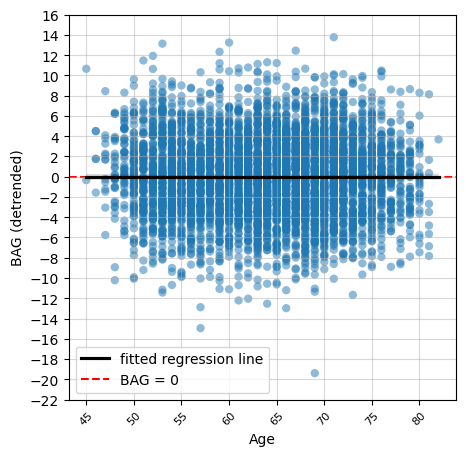

In [35]:
# shallow
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['bag_new_detrended'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='bag_new_detrended',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(-22,17,2)
axes.axhline(y=0, color='#FF0000', linestyle='--', zorder=0, label='BAG = 0') #
axes.set(ylabel='BAG (detrended)',
        yticks=y,
        xlabel='Age'
        )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='lower left')
axes.grid(alpha=0.5)
plt.savefig(fig_path+'age_detrended_BAG_deep.pdf', bbox_inches='tight')
fig.show()

In [4]:
data_overview_heldout.describe()

,eid,age,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,recurrent depressive disorder,...,genetic pc 2,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new,bag_orig_detrended,bag_new_detrended
count,5.000000e+03,5000.000000,4822.000000,3356.000000,4945.000000,4595.000000,4823.000000,4337.000000,4345.000000,3768.000000,...,4865.000000,4865.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,1.232539e+06,63.896600,26.529222,18.916269,16.753893,6.601523,30.995646,0.137192,0.138780,0.006900,...,1.313724,-0.691673,19.032000,64.395289,19.032000,64.377771,0.498689,0.481171,-9.833911e-16,-1.034550e-15
std,1.384787e+05,7.699517,4.283563,5.247140,4.366954,2.045169,10.558707,0.344089,0.345757,0.082791,...,21.618498,11.813498,11.275123,5.622703,11.275123,5.522308,5.553401,5.481446,4.050229e+00,3.930595e+00
min,1.000030e+06,45.000000,15.277200,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-277.572000,-137.802000,0.000000,46.696949,0.000000,45.954620,-21.213188,-21.445992,-1.919352e+01,-1.939482e+01
25%,1.116148e+06,58.000000,23.554525,16.000000,13.000000,5.000000,23.000000,0.000000,0.000000,0.000000,...,2.495550,-2.685410,9.000000,60.427558,9.000000,60.489405,-3.335500,-3.348375,-2.659559e+00,-2.708420e+00
50%,1.231298e+06,64.000000,25.904050,19.000000,19.000000,7.000000,30.000000,0.000000,0.000000,0.000000,...,3.694750,-1.529200,19.000000,64.438694,19.000000,64.446701,0.473392,0.406349,6.730006e-02,6.525436e-02
75%,1.346660e+06,70.000000,28.881575,23.000000,20.000000,8.000000,38.000000,0.000000,0.000000,0.000000,...,4.806550,-0.351772,29.000000,68.486275,29.000000,68.424583,4.181225,4.164459,2.695778e+00,2.667677e+00
max,2.584074e+06,82.000000,49.870100,35.000000,20.000000,13.000000,75.000000,1.000000,1.000000,1.000000,...,82.087200,93.260900,39.000000,81.600807,39.000000,81.724228,22.668129,20.507858,1.310088e+01,1.376782e+01


<Axes: xlabel='depressive episode', ylabel='count'>

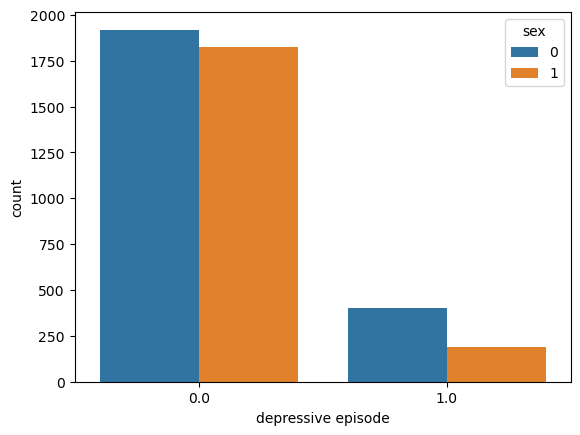

In [6]:
sns.countplot(data=data_overview_heldout, x='depressive episode', hue='sex');

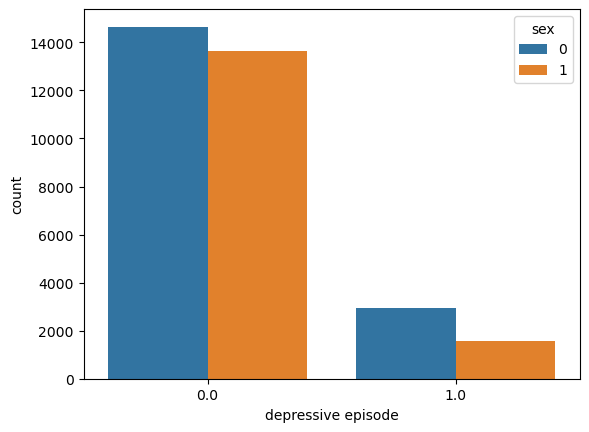

In [10]:
sns.countplot(data=data_overview_full, x='depressive episode', hue='sex');

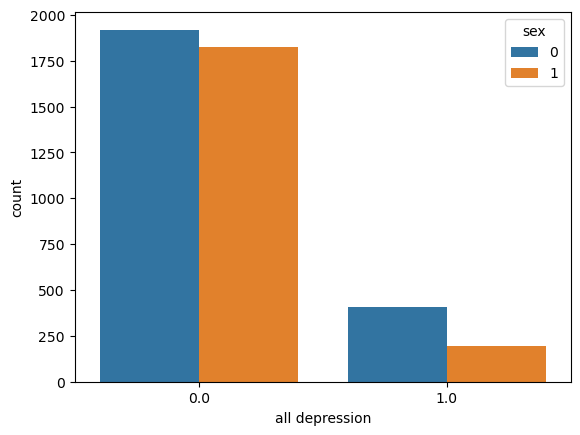

In [7]:
sns.countplot(data=data_overview_heldout, x='all depression', hue='sex');

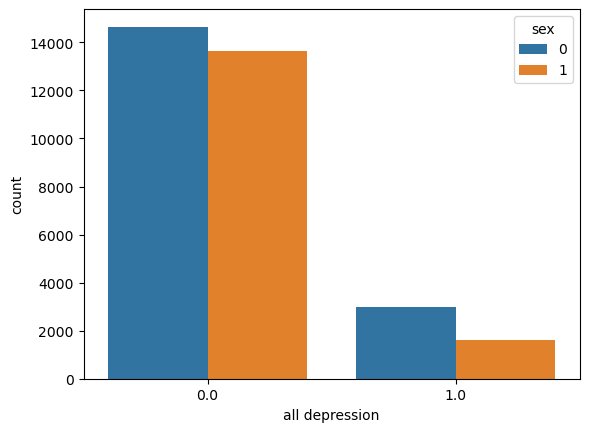

In [13]:
sns.countplot(data=data_overview_full, x='all depression', hue='sex');

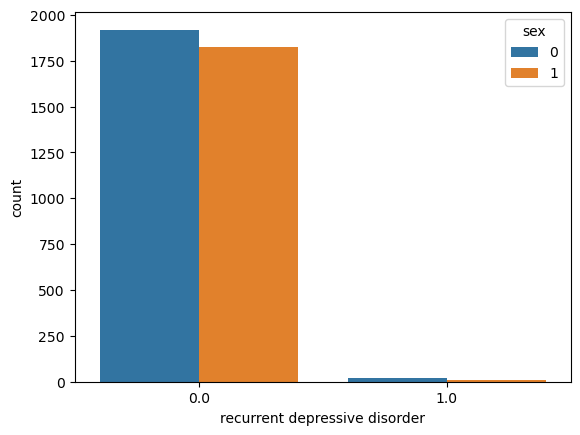

In [8]:
sns.countplot(data=data_overview_heldout, x='recurrent depressive disorder', hue='sex');

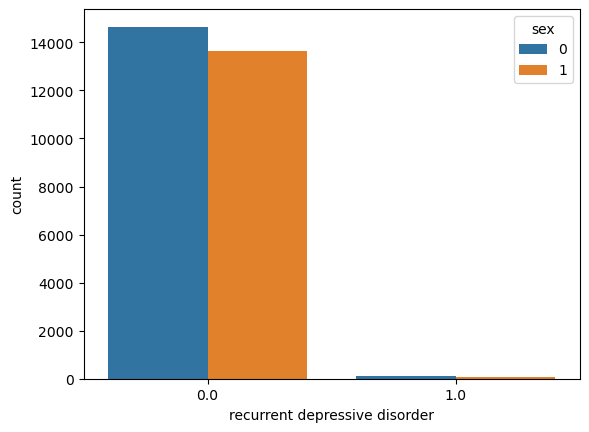

In [14]:
sns.countplot(data=data_overview_full, x='recurrent depressive disorder', hue='sex');

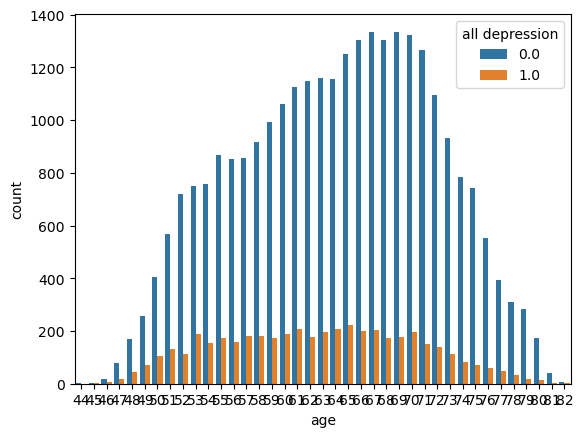

In [16]:
sns.countplot(data=data_overview_full, x='age', hue='all depression');

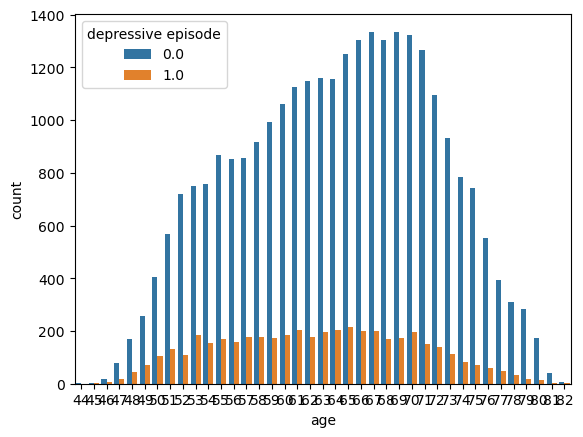

In [17]:
sns.countplot(data=data_overview_full, x='age', hue='depressive episode');

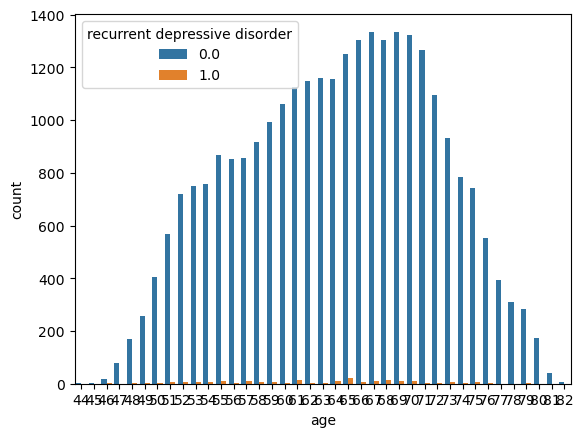

In [18]:
sns.countplot(data=data_overview_full, x='age', hue='recurrent depressive disorder');

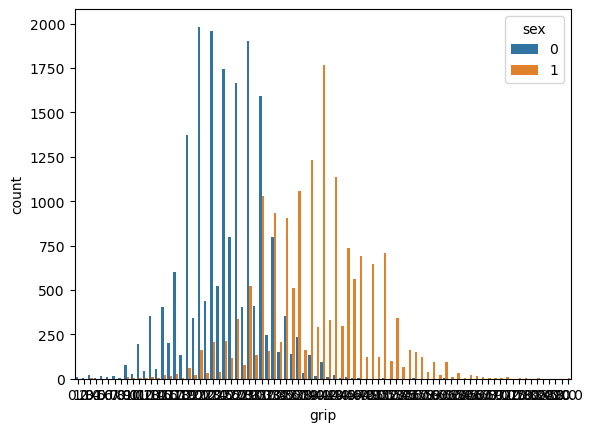

In [19]:
sns.countplot(data=data_overview_full, x='grip', hue='sex');

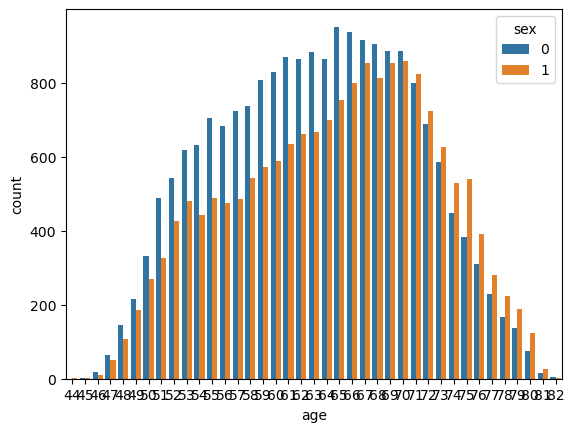

In [20]:
sns.countplot(data=data_overview_full, x='age', hue='sex');

In [21]:
data_overview_dev = data_overview_full[data_overview_full['split']!='heldout_test'].copy()

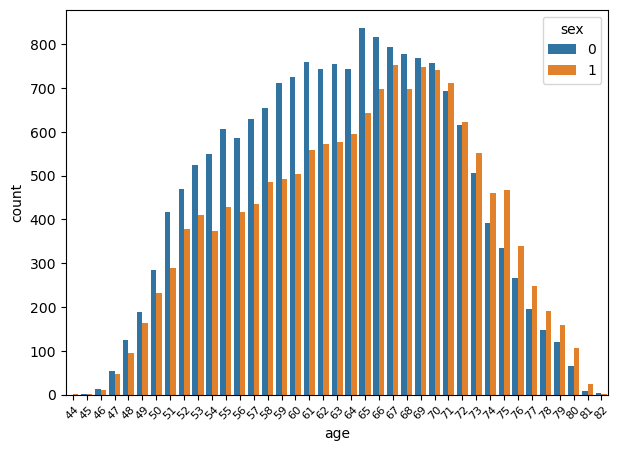

In [26]:
fig, axes = plt.subplots(1,figsize=(7, 5))
sns.countplot(data=data_overview_dev, x='age', hue='sex',ax=axes)
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
fig.show()

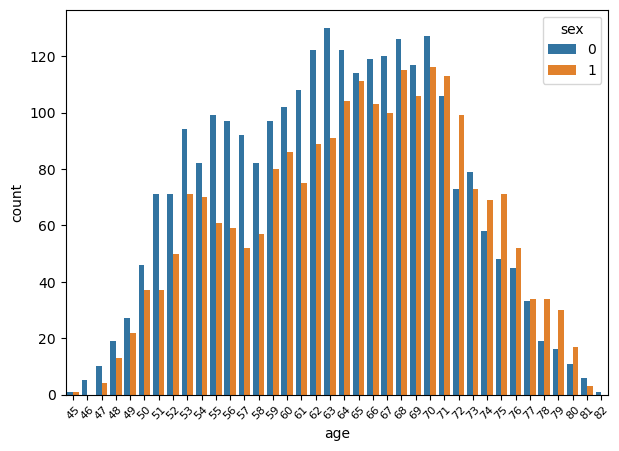

In [30]:
fig, axes = plt.subplots(1,figsize=(7, 5))
sns.countplot(data=data_overview_heldout, x='age', hue='sex',ax=axes)
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
fig.show()

<Axes: xlabel='fluid intelligence', ylabel='count'>

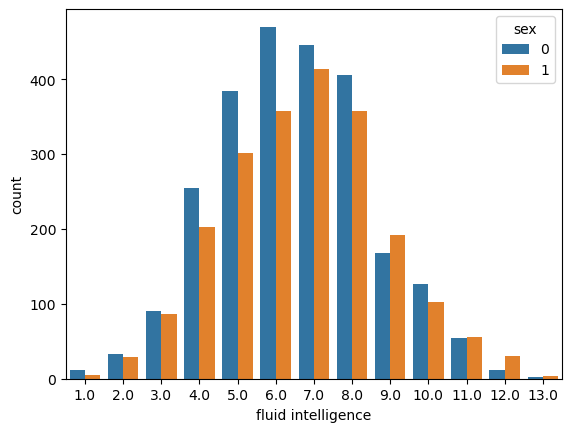

In [24]:
sns.countplot(data=data_overview_heldout, x='fluid intelligence', hue='sex');

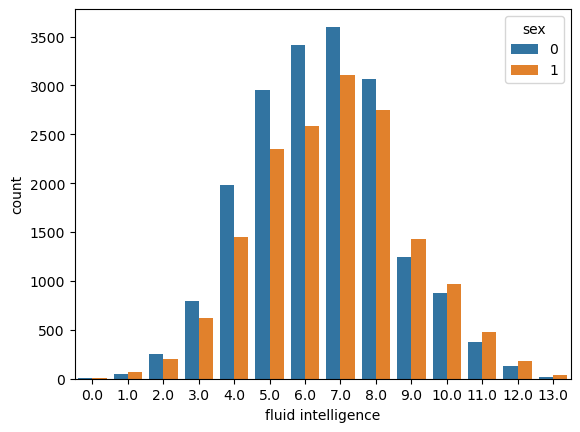

In [31]:
sns.countplot(data=data_overview_full, x='fluid intelligence', hue='sex');

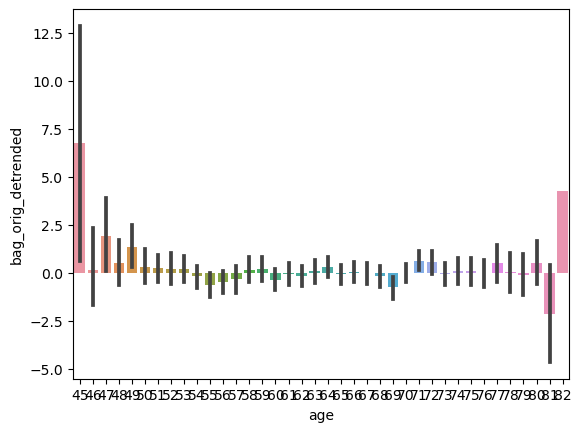

In [33]:
sns.barplot(data=data_overview_heldout, x='age', y='bag_orig_detrended');

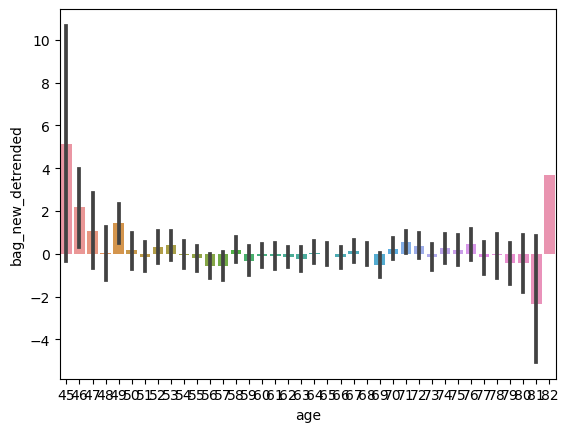

In [35]:
sns.barplot(data=data_overview_heldout, x='age', y='bag_new_detrended');